In [107]:
%reset

In [108]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import xclim as xc
import xarray as xr

In [109]:
import os
#set path for root directory
ROOT_DIR = os.path.abspath(os.curdir)

In [110]:
#import sys
#this is to reload the work in progress modules that are not in the current directory
#import importlib
#importlib.reload(hydroplotting)
#import hydroplotting

In [4]:
#load and plot SNOTEL data
from hydroplotting import funcutils as fc

#get paths for data files
# path to observations
path_Skook_obs = ROOT_DIR + '/Data/Raw/bcqc_47.68000_-121.61000._Skookum_Creek.txt'
path_Alpine_obs = ROOT_DIR + '/Data/Raw/bcqc_47.78000_-121.70000_Alpine_Meadows.txt'
#path to model data
#path_Alpine_model = ROOT_DIR + '/Data/Raw/SNOTEL_tests/prismWRFlapse_3C_Pixel_Alpine_Meadows.csv'
#path to SPU data
path_Alpine_P_SPU = ROOT_DIR + 'Data/Raw/p0908_precip_AlpineM.csv'
path_Skook_P_SPU = ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.txt'
#path to model data
path_Alpine_model = ROOT_DIR + '/Data/Raw/DHSVM_prismWRFlapse_3C_Pixel_Alpine_Meadows.csv'
path_Skook_model = ROOT_DIR + '/Data/Raw/DHSVM_prismWRFlapse-3C_Pixel.Skookum_Creek.csv'

In [5]:
# get Alpine Meadows model  data and plot annual precipitation
model_data_Alpine = fc.get_model_dataframe(path_Alpine_model)
model_data_Skookum = fc.get_model_dataframe(path_Skook_model)
#get into the xarray and xclim format
ds_model_point_Alpine = fc.model_point_data_xr(model_data_Alpine)
ds_model_point_Skookum = fc.model_point_data_xr(model_data_Skookum)

annual_P_Alpine_model = xc.atmos.precip_accumulation(ds_model_point_Alpine.prec_point, freq="YS")
annual_P_Skookum_model = xc.atmos.precip_accumulation(ds_model_point_Skookum.prec_point, freq="YS")

#convert to dataframe for plotting
annual_P_Alpine_model_df = annual_P_Alpine_model.to_dataframe()
annual_P_Skookum_model_df = annual_P_Skookum_model.to_dataframe()


/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


In [6]:
#annual_P_Alpine_df = annual_P_Alpine.to_dataframe()

Text(0, 0.5, 'Total annual precipitation  [m]')

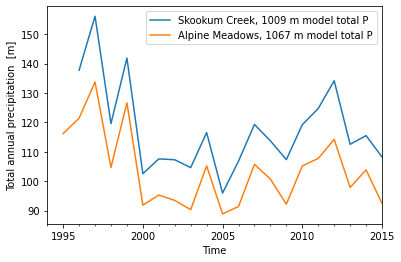

In [7]:
ax = annual_P_Skookum_model_df.plot(kind='line',  y = 'prcptot', label = 'Skookum Creek, 1009 m model total P')
annual_P_Alpine_model_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m model total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  [m]')

Text(0, 0.5, 'Model SWE [m]')

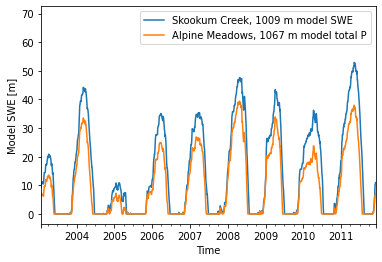

In [8]:
#plot model SWE
ax = model_data_Skookum.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model SWE')
model_data_Alpine.plot(kind='line', y = 'swq', label = 'Alpine Meadows, 1067 m model total P', ax = ax)
ax.set_xlim([datetime(2003, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Model SWE [m]')

In [9]:
#plot SPU data for the Snotels
model_data_Alpine


,Unnamed: 0,prec_point,swq,tmean_point,tmax_point,tmin_point,prec_ref,swe,tmean_ref,tmax_ref,tmin_ref
time,,,,,,,,,,,
1994-10-01,1994-10-01,0.087608,0.000000,5.844710,8.32189,1.51605,0.0,0.0,7.683333,9.972222,2.533333
1994-10-02,1994-10-02,0.000009,0.000000,3.264018,9.79408,-1.59085,0.0,0.0,4.250000,7.683333,0.816667
1994-10-03,1994-10-03,0.000000,0.000000,4.552358,11.27140,-1.10904,0.0,0.0,7.111111,15.122222,1.961111
1994-10-04,1994-10-04,0.000000,0.000000,8.082585,15.52130,2.43062,0.0,0.0,8.827778,16.266667,4.822222
1994-10-05,1994-10-05,0.004883,0.000000,6.432679,12.25500,2.64974,0.0,0.0,5.966667,12.833333,2.533333
...,...,...,...,...,...,...,...,...,...,...,...
2015-12-27,2015-12-27,0.457857,11.443062,-5.452186,-4.73145,-7.70191,0.9,15.5,-1.472222,0.244444,-3.761111
2015-12-28,2015-12-28,0.261979,11.691068,-5.441064,-5.00870,-6.35044,0.0,16.4,-2.044444,0.816667,-3.761111
2015-12-29,2015-12-29,0.061155,11.956591,-7.911727,-4.90663,-11.13420,0.0,16.4,-3.761111,0.244444,-7.194444


In [10]:
#calculate mean difference Skookum-Alpine
mean_model_diff_P = annual_P_Skookum_model_df.mean() - annual_P_Alpine_model_df.mean()
print(annual_P_Skookum_model_df.mean())
print(annual_P_Alpine_model_df.mean())
print(mean_model_diff_P)

prcptot    117.564505
dtype: float64
prcptot    103.753172
dtype: float64
prcptot    13.811333
dtype: float64


/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


Text(0, 0.5, 'Total annual precipitation  []')

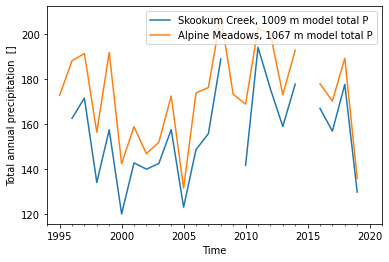

In [11]:
#create dataframes for the SNOTEL stations
snotel_Skookum = fc.snotel_data(path_Skook_obs)
snotel_Alpine = fc.snotel_data(path_Alpine_obs)
# move into xarray datasets
ds_bcbq_obs_Skookum = fc.bcbq_snotel_data_xr(snotel_Skookum)
#out = xc.atmos.precip_accumulation(ds_bcbq_obs_SPU_skook.daily_P_in, freq="YS")
#out.plot()
ds_bcbq_obs_Alpine = fc.bcbq_snotel_data_xr(snotel_Alpine)

annual_P_Alpine_bcbq_obs = xc.atmos.precip_accumulation(ds_bcbq_obs_Alpine.daily_P_in, freq="YS")
annual_P_Skookum_bcbq_obs = xc.atmos.precip_accumulation(ds_bcbq_obs_Skookum.daily_P_in, freq="YS")

#convert to dataframe
annual_P_Alpine_bcbq_obs_df = annual_P_Alpine_bcbq_obs.to_dataframe()
annual_P_Skookum_bcbq_obs_df = annual_P_Skookum_bcbq_obs.to_dataframe()

#plot

ax = annual_P_Skookum_bcbq_obs_df.plot(kind='line',  y = 'prcptot', label = 'Skookum Creek, 1009 m model total P')
annual_P_Alpine_bcbq_obs_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m model total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')

prcptot   -69.167661
dtype: float64

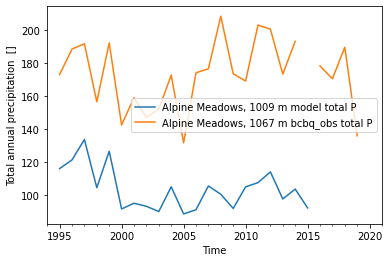

In [13]:
#snotel_Skookum.index.set_names('time', inplace=True)
#plot observed total P model vs. observed at Alpine Meadows
ax = annual_P_Alpine_model_df.plot(kind='line',  y = 'prcptot', label = 'Alpine Meadows, 1009 m model total P')
annual_P_Alpine_bcbq_obs_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m bcbq_obs total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')
mean_model_obs_diff_P = annual_P_Alpine_model_df.mean()-annual_P_Alpine_bcbq_obs_df.mean()
mean_model_obs_diff_P

prcptot   -38.226404
dtype: float64

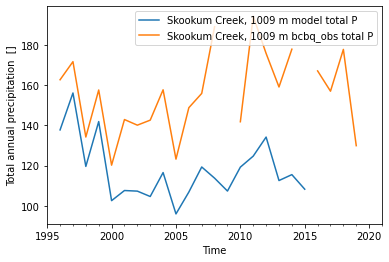

In [14]:
#plot observed total P model vs. observed at Alpine Meadows
ax = annual_P_Skookum_model_df.plot(kind='line',  y = 'prcptot', label = 'Skookum Creek, 1009 m model total P')
annual_P_Skookum_bcbq_obs_df.plot(kind='line', y = 'prcptot', label = 'Skookum Creek, 1009 m bcbq_obs total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')
mean_model_obs_diff_P = annual_P_Skookum_model_df.mean()-annual_P_Skookum_bcbq_obs_df.mean()
mean_model_obs_diff_P

Text(0, 0.5, 'Total annual precipitation  []')

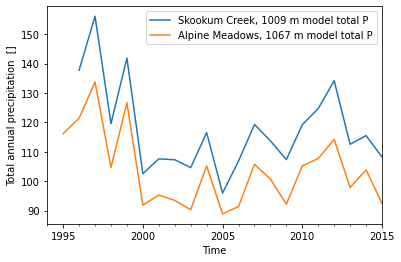

In [15]:
#plot model precip and obs precip at Alpine
#plot observed total P
ax = annual_P_Skookum_model_df.plot(kind='line',  y = 'prcptot', label = 'Skookum Creek, 1009 m model total P')
annual_P_Alpine_model_df.plot(kind='line', y = 'prcptot', label = 'Alpine Meadows, 1067 m model total P', ax = ax)
#ax.set_xlim([datetime(1995, 1, 21), datetime(2019, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Total annual precipitation  []')

Text(0, 0.5, 'SWE [m]')

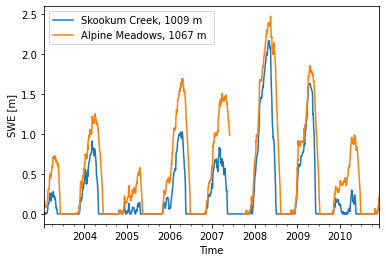

In [16]:
#plot SNOTELS:
ax = snotel_Skookum.plot(kind='line',  y = 'SWE_m', label = 'Skookum Creek, 1009 m')
snotel_Alpine.plot(kind='line', y = 'SWE_m', label = 'Alpine Meadows, 1067 m ', ax = ax)
ax.set_xlim([datetime(2003, 1, 21), datetime(2010, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [m]')

#plt.show()

In [17]:
snotel_Skookum

,year,month,day,daily_P_in,Tmax_F,Tmin_F,Tmean_F,SWE_in,Tmean_C,Tmin_C,Tmax_C,SWE_m,datetime,water_year
time,,,,,,,,,,,,,,
1995-08-30,1995,8,30,NaN,65.40,48.92,53.04,0.0,11.688889,9.400000,18.555556,0.00000,1995-08-30,1995
1995-08-31,1995,8,31,NaN,72.61,48.92,61.28,0.0,16.266667,9.400000,22.561111,0.00000,1995-08-31,1995
1995-09-01,1995,9,1,NaN,78.79,58.19,67.46,0.0,19.700000,14.550000,25.994444,0.00000,1995-09-01,1995
1995-09-02,1995,9,2,NaN,82.91,58.19,68.49,0.0,20.272222,14.550000,28.283333,0.00000,1995-09-02,1995
1995-09-03,1995,9,3,NaN,80.85,50.98,62.31,0.0,16.838889,10.544444,27.138889,0.00000,1995-09-03,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-26,2021,9,26,0.3,56.13,43.77,50.98,0.1,10.544444,6.538889,13.405556,0.00254,2021-09-26,2021
2021-09-27,2021,9,27,1.5,50.98,40.68,44.80,0.2,7.111111,4.822222,10.544444,0.00508,2021-09-27,2021
2021-09-28,2021,9,28,1.9,43.77,39.65,41.71,0.2,5.394444,4.250000,6.538889,0.00508,2021-09-28,2021


In [451]:
#skook_ds = snotel_Skookum.to_xarray()
#alpine_ds = snotel_Alpine.to_xarray()

Text(0, 0.5, 'SWE [in]')

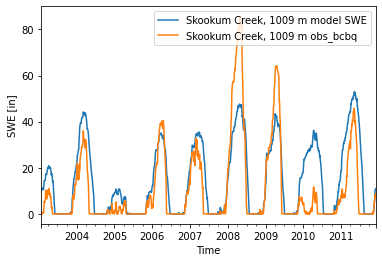

In [18]:
#plot modeled SWE vs. observed at Skookum Creek
ax = model_data_Skookum.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model SWE')
snotel_Skookum.plot(kind='line',  y = 'SWE_in', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
ax.set_xlim([datetime(2003, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

Text(0, 0.5, 'SWE [in]')

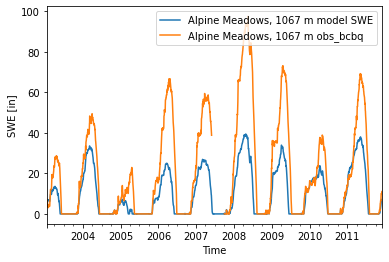

In [19]:
#plot modeled SWE vs. observed at Skookum Creek
ax = model_data_Alpine.plot(kind='line',  y = 'swq', label = 'Alpine Meadows, 1067 m model SWE')
snotel_Alpine.plot(kind='line',  y = 'SWE_in', label = 'Alpine Meadows, 1067 m obs_bcbq', ax = ax)
ax.set_xlim([datetime(2003, 1, 21), datetime(2011, 12, 1)])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

In [21]:
#check the temperature data
#test = skook_ds['daily_P_in'].cumsum(dim = "index").resample(index = "1y")
#test

snotel_Alpine.head()

,year,month,day,daily_P_in,Tmax_F,Tmin_F,Tmean_F,SWE_in,Tmean_C,Tmin_C,Tmax_C,SWE_m,datetime,water_year
time,,,,,,,,,,,,,,
1994-09-22,1994,9,22,NaN,35.53,34.50,34.50,NaN,1.388889,1.388889,1.961111,NaN,1994-09-22,1994
1994-09-23,1994,9,23,NaN,79.82,57.16,63.34,NaN,17.411111,13.977778,26.566667,NaN,1994-09-23,1994
1994-09-24,1994,9,24,NaN,79.82,55.10,62.31,NaN,16.838889,12.833333,26.566667,NaN,1994-09-24,1994
1994-09-25,1994,9,25,NaN,73.64,48.92,57.16,NaN,13.977778,9.400000,23.133333,NaN,1994-09-25,1994
1994-09-26,1994,9,26,NaN,70.55,47.89,55.10,NaN,12.833333,8.827778,21.416667,NaN,1994-09-26,1994


In [22]:
model_data_Alpine.head()

,Unnamed: 0,prec_point,swq,tmean_point,tmax_point,tmin_point,prec_ref,swe,tmean_ref,tmax_ref,tmin_ref
time,,,,,,,,,,,
1994-10-01,1994-10-01,0.087608,0.0,5.844710,8.32189,1.51605,0.0,0.0,7.683333,9.972222,2.533333
1994-10-02,1994-10-02,0.000009,0.0,3.264018,9.79408,-1.59085,0.0,0.0,4.250000,7.683333,0.816667
1994-10-03,1994-10-03,0.000000,0.0,4.552358,11.27140,-1.10904,0.0,0.0,7.111111,15.122222,1.961111
1994-10-04,1994-10-04,0.000000,0.0,8.082585,15.52130,2.43062,0.0,0.0,8.827778,16.266667,4.822222
1994-10-05,1994-10-05,0.004883,0.0,6.432679,12.25500,2.64974,0.0,0.0,5.966667,12.833333,2.533333


6.421701112504519
9.182247426565795
-2.7605463140612754


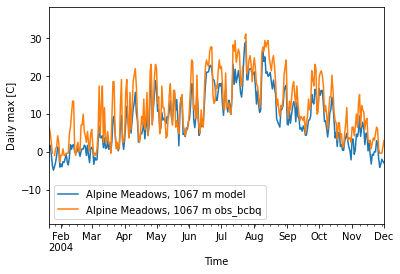

In [32]:
#plot temperature data
#plot modeled SWE vs. observed at Alpine Meadows
ax = model_data_Alpine.plot(kind='line',  y = 'tmax_point', label = 'Alpine Meadows, 1067 m model')
snotel_Alpine.plot(kind='line',  y = 'Tmax_C', label = 'Alpine Meadows, 1067 m obs_bcbq', ax = ax)
ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Daily max [C]')

mean_model_diff_T = model_data_Alpine.tmax_point.mean() - snotel_Alpine.Tmax_C.mean()

print(model_data_Alpine.tmax_point.mean())
print(snotel_Alpine.Tmax_C.mean())
print(mean_model_diff_T)

5.679045003992715
10.270715267044466
-4.591670263051751


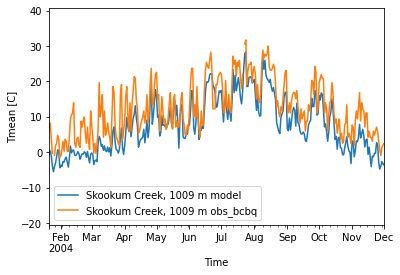

In [34]:
#plot modeled SWE vs. observed at Alpine Meadows
ax = model_data_Skookum.plot(kind='line',  y = 'tmax_point', label = 'Skookum Creek, 1009 m model')
snotel_Skookum.plot(kind='line',  y = 'Tmax_C', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
ax.set_xlim([datetime(2004, 1, 21), datetime(2004, 12, 1)])
plt.xlabel('Time')
plt.ylabel('Tmean [C]')

mean_model_diff_T = model_data_Skookum.tmax_point.mean() - snotel_Skookum.Tmax_C.mean()

print(model_data_Skookum.tmax_point.mean())
print(snotel_Skookum.Tmax_C.mean())
print(mean_model_diff_T)

In [57]:
airTDJF_snotel_bcbq_Skookum = xc.atmos.tg_mean(ds_bcbq_obs_Skookum.Tmean_C, season="MAM")
airTDJF_snotel_bcbq_Alpine = xc.atmos.tg_mean(ds_bcbq_obs_Alpine.Tmean_C, season="MAM")

airTDJF_model_Skookum = xc.atmos.tg_mean(ds_model_point_Skookum.tmean_point, season="MAM")
airTDJF_model_Alpine = xc.atmos.tg_mean(ds_model_point_Alpine.tmean_point, season="MAM")

tas_C_snotel_bcbq_Skookum = xc.units.convert_units_to(airTDJF_snotel_bcbq_Skookum, "degC")
tas_C_snotel_bcbq_Alpine = xc.units.convert_units_to(airTDJF_snotel_bcbq_Alpine, "degC")

tas_C_model_Skookum = xc.units.convert_units_to(airTDJF_model_Skookum, "degC")
tas_C_model_Alpine = xc.units.convert_units_to(airTDJF_model_Alpine, "degC")


print("airTDJF_snotel_bcbq_Skookum =", tas_C_snotel_bcbq_Skookum.mean())
print("airTDJF_snotel_bcbq_Alpine =", tas_C_snotel_bcbq_Alpine.mean())

print("airTDJF_model_Skookum =", tas_C_model_Skookum.mean())
print("airTDJF_model_Alpine =", tas_C_model_Alpine.mean())

#airTDJF_DM = xc.atmos.tg_mean(ds2.airtemp, season="DJF")
#airT_Y_DM = xc.atmos.tg_mean(ds2.airtemp, freq="YS")



airTDJF_snotel_bcbq_Skookum = <xarray.DataArray 'tg_mean' ()>
array(4.25279891)
airTDJF_snotel_bcbq_Alpine = <xarray.DataArray 'tg_mean' ()>
array(3.00115166)
airTDJF_model_Skookum = <xarray.DataArray 'tg_mean' ()>
array(0.31211548)
airTDJF_model_Alpine = <xarray.DataArray 'tg_mean' ()>
array(0.87391509)


/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/indicators/atmos/_precip.py:80: UserWarning: Variable does not have a `standard_name` attribute.
  cfchecks.check_valid(tas, "standard_name", "air_temperature")
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Varia

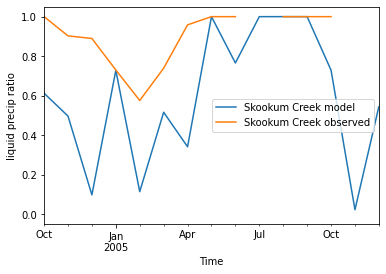

In [105]:
pr_liquid_ratio_Skookum_model = xc.indicators.atmos._precip.liquid_precip_ratio(ds_model_point_Skookum.prec_point, ds_model_point_Skookum.tmean_point, freq="M")
pr_liquid_ratio_Skookum_observed = xc.indicators.atmos._precip.liquid_precip_ratio(ds_bcbq_obs_Skookum.daily_P_in, ds_bcbq_obs_Skookum.Tmean_C, freq="M")

ax = pr_liquid_ratio_Skookum_model.to_dataframe().liquid_precip_ratio.plot(kind='line',  label = 'Skookum Creek model')
pr_liquid_ratio_Skookum_observed.to_dataframe().liquid_precip_ratio.plot(kind='line', label = 'Skookum Creek observed', ax = ax)
ax.set_xlim([datetime(2004, 10, 1), datetime(2005, 12, 1)])
plt.xlabel('Time')
plt.ylabel('liquid precip ratio')
plt.gca().legend(('Skookum Creek model','Skookum Creek observed'))

In [75]:
pr_liquid_ratio_Alpine_model.to_dataframe.plot(kind='line',  y = 'tmax_point', label = 'Skookum Creek, 1009 m model')

<xarray.DataArray 'liquid_precip_ratio' (time: 86)>
array([           nan, 5.37701073e-01, 5.92393714e-01, 1.00000000e+00,
       8.69569136e-01, 6.27206630e-01, 6.64776701e-01, 1.00000000e+00,
       4.07124698e-01, 1.10362222e-01, 5.33550736e-01, 1.00000000e+00,
       7.38434452e-01, 1.65554216e-01, 3.57494509e-01, 1.00000000e+00,
       7.53504336e-01, 8.39651823e-02, 1.68076254e-01, 9.47024077e-01,
       6.39506087e-01, 1.22840126e-01, 3.52431951e-01, 1.00000000e+00,
       7.35915000e-01, 1.41654224e-01, 4.28824078e-01, 8.11192307e-01,
       6.48419078e-01, 2.55646099e-01, 3.41177240e-01, 9.81724028e-01,
       8.46084891e-01, 3.66729021e-01, 3.94458370e-01, 1.00000000e+00,
       6.00386015e-01, 1.36795452e-01, 6.08686158e-01, 1.00000000e+00,
       6.68233464e-01, 4.17982353e-01, 6.77877505e-01, 8.58906909e-01,
       5.03531296e-01, 2.90506378e-01, 4.21612839e-01, 1.00000000e+00,
       6.72281124e-01, 1.51454833e-01, 6.55243313e-01, 9.84441238e-01,
       7.01646197e-01, 9.28788718e-02, 2.18347644e-01, 6.63480501e-01,
       8.63554994e-01, 4.97210122e-02, 1.59383751e-01, 1.00000000e+00,
       4.38896475e-01, 4.76501972e-01, 3.28783134e-01, 9.35170607e-01,
       6.50537956e-01, 2.43687415e-01, 2.32171885e-01, 8.13778243e-01,
       5.93266385e-01, 1.08429085e-01, 2.81965025e-01, 9.35662837e-01,
       7.69234139e-01, 0.00000000e+00, 5.46380191e-01, 1.00000000e+00,
       6.60334762e-01, 1.51809187e-05, 5.12626100e-01, 1.00000000e+00,
       7.47527851e-01, 6.44140611e-01, 6.96273057e-01, 1.00000000e+00,
       7.80404000e-01,            nan])
Coordinates:
  * time     (time) datetime64[ns] 1994-09-01 1994-12-01 ... 2015-12-01
Attributes:
    units:         
    cell_methods:  
    history:       pr: \ntas: \n[2022-09-16 15:34:14] liquid_precip_ratio: LI...
    long_name:     Ratio of rainfall to total precipitation.
    description:   Seasonal ratio of rainfall to total precipitation. rainfal...

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/indicators/atmos/_precip.py:80: UserWarning: Variable does not have a `standard_name` attribute.
  cfchecks.check_valid(tas, "standard_name", "air_temperature")
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Varia

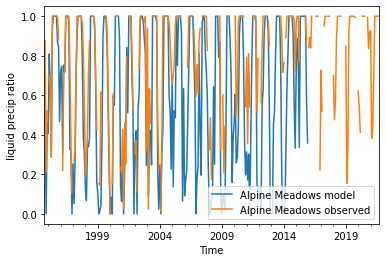

In [106]:
pr_liquid_ratio_Alpine_model = xc.indicators.atmos._precip.liquid_precip_ratio(ds_model_point_Alpine.prec_point, ds_model_point_Alpine.tmean_point, freq="M")
pr_liquid_ratio_Alpine_observed = xc.indicators.atmos._precip.liquid_precip_ratio(ds_bcbq_obs_Alpine.daily_P_in, ds_bcbq_obs_Alpine.Tmean_C, freq="M")

ax = pr_liquid_ratio_Alpine_model.to_dataframe().liquid_precip_ratio.plot(kind='line',  label = 'Alpine Meadows')
pr_liquid_ratio_Alpine_observed.to_dataframe().liquid_precip_ratio.plot(kind='line', label = 'Alpine Meadows', ax = ax)
#ax.set_xlim([datetime(2004, 10, 1), datetime(2005, 12, 1)])
plt.xlabel('Time')
plt.ylabel('liquid precip ratio')
plt.gca().legend(('Alpine Meadows model','Alpine Meadows observed'))

In [140]:
path_snotel_skooK_P_SPU = ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.txt'
#skooK_P_SPU = pd.read_csv(ROOT_DIR + '/Data/Raw/p0912_precip_SkookumCr.csv')

In [141]:
#def spu_snotel_data(path_SPU):
#    parse_dates = ['DateTime']
#    snotel_obs = pd.read_csv(path_SPU,  sep='\s+', parse_dates=parse_dates)
#    snotel_obs = snotel_obs.set_index(snotel_obs['DateTime'])
#    calc_water_year_apply_SPU(snotel_obs)
#    return snotel_obs

In [142]:

snotel_obs_SPU_skook = fc.spu_snotel_data(path_snotel_skooK_P_SPU)
#snotel_obs_SPU_skook.Total.plot()
#snotel_obs_SPU_skook.index.rename('time')
#idx = snotel_obs_SPU_skook.index
#idx.set_names('time')

In [143]:
#SPU_data_frame = snotel_obs_SPU_skook

#time_index = SPU_data_frame.DateTime
#time_index  = time_index.to_numpy()
#SPU_data = SPU_data_frame.to_numpy()
#snotel_obs_SPU = xr.DataArray(SPU_data, coords= [time_index], dims= 'time')
#ds_snotel_obs_SPU = snotel_obs_SPU.to_dataset()
#ds_snotel_obs_SPU['Max'].attrs['units'] = "mm/d"
#ds_snotel_obs_SPU['Min'].attrs['units'] = "mm/d"
#ds_snotel_obs_SPU['Total'].attrs['units'] = "mm/d"


/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


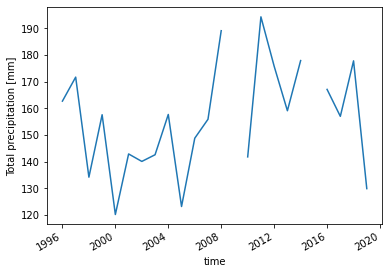

In [128]:
ds_bcbq_obs_SPU_skook = fc.bcbq_snotel_data_xr(snotel_Skookum)
out = xc.atmos.precip_accumulation(ds_bcbq_obs_SPU_skook.daily_P_in, freq="YS")
out.plot()

In [130]:
ds_snotel_obs_SPU_skook = fc.spu_snotel_data_xr(snotel_obs_SPU_skook)

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


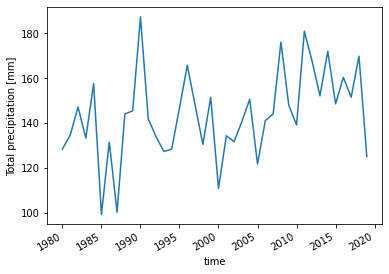

In [131]:
out1 = xc.atmos.precip_accumulation(ds_snotel_obs_SPU_skook.Total, freq="YS")
out1.plot()

In [132]:
out_df = out.to_dataframe()
out1_df = out1.to_dataframe()
out1_df

,prcptot
time,
1979-01-01,NaN
1980-01-01,128.497
1981-01-01,134.716
1982-01-01,147.233
1983-01-01,133.345
1984-01-01,157.707
1985-01-01,99.304
1986-01-01,131.616
1987-01-01,100.340


<AxesSubplot:xlabel='time'>

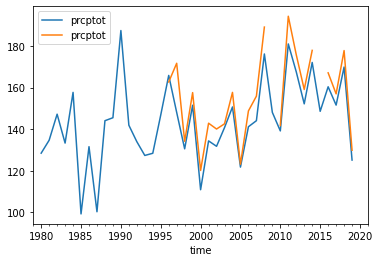

In [133]:
ax = out1_df.plot()
out_df.plot(ax=ax)

In [487]:
def bcbq_snotel_data_xr(bcbq_data_frame):
    """get precip data in xclim format
    add units for processing with xclim"""
    bcbq_data_frame.index.set_names('time', inplace=True)
    snotel_obs = bcbq_data_frame.to_xarray()
    #time_index = snotel_obs_.index
    #time_index  = time_index.to_numpy()
    #bcbq_data_frame_ = snotel_obs_.to_array

    #snotel_obs = xr.DataArray(
    #    bcbq_data_frame_,
    #coords= [time_index],
    #dims= 'time',
    #)
    snotel_obs.daily_P_in.attrs['units'] = "mm/d"
    snotel_obs['Tmax_F'].attrs['units'] = "F"
    snotel_obs['Tmin_F'].attrs['units'] = "F"
    snotel_obs['Tmean_F'].attrs['units'] = "F"
    snotel_obs['Tmean_C'].attrs['units'] = "C"
    snotel_obs['SWE_in'].attrs['units'] = "in"
    snotel_obs['SWE_m'].attrs['units'] = "m"
    return snotel_obs

In [318]:
out2 = xc.atmos.tx_days_above(ds_temp.Tmean_C, thresh="20 C", freq="MS")

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


KeyError: 'units'

In [154]:
out2

<xarray.DataArray 'tx_days_above' (time: 314, index: 9529)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
  * time     (time) datetime64[ns] 1995-08-01 1995-09-01 ... 2021-09-01
  * index    (index) datetime64[ns] 1995-08-30 1995-08-31 ... 2021-09-30
Attributes:
    units:          days
    cell_methods:    time: sum over days
    history:        [2022-07-23 10:10:51] tx_days_above: TX_DAYS_ABOVE(tasmax...
    standard_name:  number_of_days_with_air_temperature_above_threshold
    long_name:      Number of days with tmax > 20 c
    description:    Monthly number of days where daily maximum temperature ex...

In [179]:
time_index = np.array(time_index)
time_index

In [179]:
#temp = skook_ds.Tmean_C
#temp.index.name = 'time'
#test.rename({'index':'time'})
#test

In [179]:
skook_ds.index.name = 'time'
skook_ds.rename({'index':'time'})
skook_ds

In [179]:
#temp.to_dataset()
out2 = xc.atmos.tx_days_above(da, thresh="20 C", freq="MS")

In [113]:
%reset

In [116]:
import xarray as xr
import xclim as xc

In [117]:
#ds = xr.open_dataset('/Users/nicoleta/Desktop/code/summa_snow_layering_analysis-master/run_simulations/reynolds/forcing/forcing_above_aspen.nc')
ds1 = xr.open_dataset('/Users/nicoleta/Desktop/code/summa_snow_layering_analysis-master/run_simulations/coldeport/forcings/col-de-port_1993-2011.nc', engine = 'scipy')


TypeError: Error: /Users/nicoleta/Desktop/code/summa_snow_layering_analysis-master/run_simulations/coldeport/forcings/col-de-port_1993-2011.nc is not a valid NetCDF 3 file
            If this is a NetCDF4 file, you may need to install the
            netcdf4 library, e.g.,

            $ pip install netcdf4
            

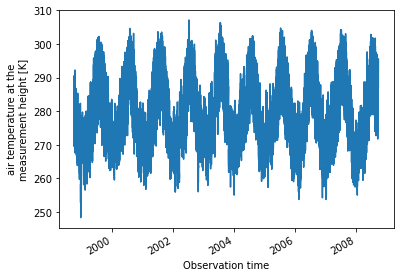

In [81]:
ds.airtemp.plot()

In [68]:
#ds.airtemp.time.head()
#ds.airtemp.resample(time = '1D').mean()
#ds.airtemp

In [69]:
#out = xc.atmos.tx_max(ds.airtemp, freq="YS")
#print(out)

In [ ]:
#out2 = xc.atmos.tx_days_above(ds_temp.Tmean_C, thresh="20 C", freq="MS")

In [82]:
with xc.set_options(
        check_missing="pct",
        missing_options={"pct": dict(tolerance=0.1)},
        data_validation="log",
):
    # Change the missing method to "percent", instead of the default "any"
    # Set the tolerance to 10%, periods with more than 10% of missing data
    #     in the input will be masked in the ouput.
    airTDJF = out = xc.atmos.tx_mean(ds.airtemp, season="DJF")
    airT_Y = out = xc.atmos.tx_mean(ds.airtemp, freq="YS")

/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:41: UserWarning: Variable does not have a `cell_methods` attribute.
  _check_cell_methods(
/opt/homebrew/Caskroom/miniforge/base/envs/xclim_env/lib/python3.8/site-packages/xclim/core/cfchecks.py:45: UserWarning: Variable does not have a `standard_name` attribute.
  check_valid(vardata, "standard_name", data["standard_name"])


In [84]:
tas_C = xc.units.convert_units_to(airTDJF, "degC")
tas_C_Y = xc.units.convert_units_to(airT_Y, "degC")
print(tas_C.mean())
print(tas_C_Y.mean())

<xarray.DataArray 'tx_mean' ()>
array(-3.69909261)
<xarray.DataArray 'tx_mean' ()>
array(4.89210871)
